## 군집 분석 비교
#### 필요한 패키지를 불러온다:

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#### 데이터를 불러온다:

In [21]:
os.chdir(r"D:\python_ML\python_ml_basic\data")

In [22]:
# df = pd.read_csv('data_KOSPI200_en.csv', header='infer',encoding='ISO-8859-1')
df = pd.read_csv('data_circles.csv', header='infer',encoding='latin1')

In [23]:
df.shape

(300, 2)

In [24]:
df.head(5)

,X,Y
0,-0.117282,-0.254887
1,-0.816974,-0.157182
2,0.092162,-0.117499
3,-0.026198,-0.022211
4,-0.148962,0.019738


In [25]:
header = df.columns

#### KMeans로 2개의 클러스터:

In [26]:
X=np.array(df)

In [40]:
kmeans = KMeans(n_clusters=2)
result = kmeans.fit(X).labels_
mycolor = []
for i in result:
    if i == 0:
        mycolor.append('red')
    else:
        mycolor.append('blue')

[[ 0.20223839 -0.43133523]
 [-0.72999478  1.13569755]]


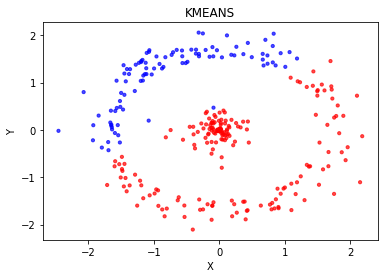

In [41]:
plt.scatter(X[:,0],X[0:,1],marker="o",alpha=0.7,s=10,c=mycolor)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("KMEANS")

print(kmeans.cluster_centers_)
plt.show()

#### 병합 군집화 (계층적 군집화)로 2개의 클러스터:

In [29]:
agglo = AgglomerativeClustering(n_clusters=2)
result = agglo.fit(X).labels_
mycolor = []
for i in result:
    if i == 0:
        mycolor.append('red')
    else:
        mycolor.append('blue')

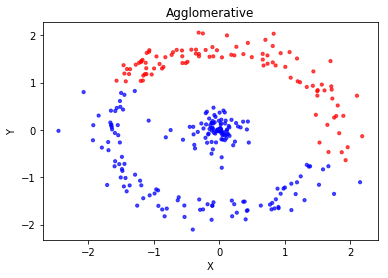

In [30]:
plt.scatter(X[:,0],X[0:,1],marker="o",alpha=0.7, s=10,c=mycolor)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Agglomerative")
plt.show()

Text(0,0.5,'y')

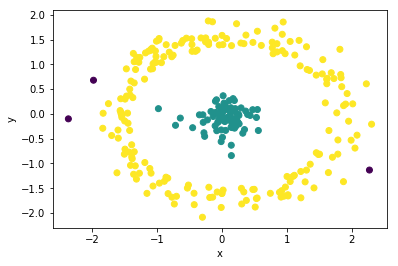

In [37]:
#표준화(평균=0, 분산=1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df[["X", "Y"]])
scaled_X = scale.transform(df[["X", "Y"]])


df["scaled_x"] = scaled_X[:,0]
df["scaled_y"] = scaled_X[:,1]

#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=5) #기본값이다.
cluster = dbscan.fit_predict(scaled_X)
df["cluster"] = cluster

#clustering 결과 확인
plt.scatter(x=df.scaled_x, y=df.scaled_y, c=df.cluster)
plt.xlabel("x")
plt.ylabel("y")

#### DBSCAN 군집화로 2개의 클러스터:

In [38]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
result = dbscan.fit(X).labels_
mycolor = []
for i in result:
    if i == 0:
        mycolor.append('red')
    elif i == 1:
        mycolor.append('blue')
    else:
        mycolor.append('black')

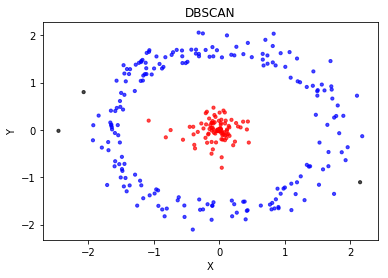

In [39]:
plt.scatter(X[:,0],X[0:,1],marker="o",alpha=0.7, s=10,c=mycolor)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("DBSCAN")
plt.show()